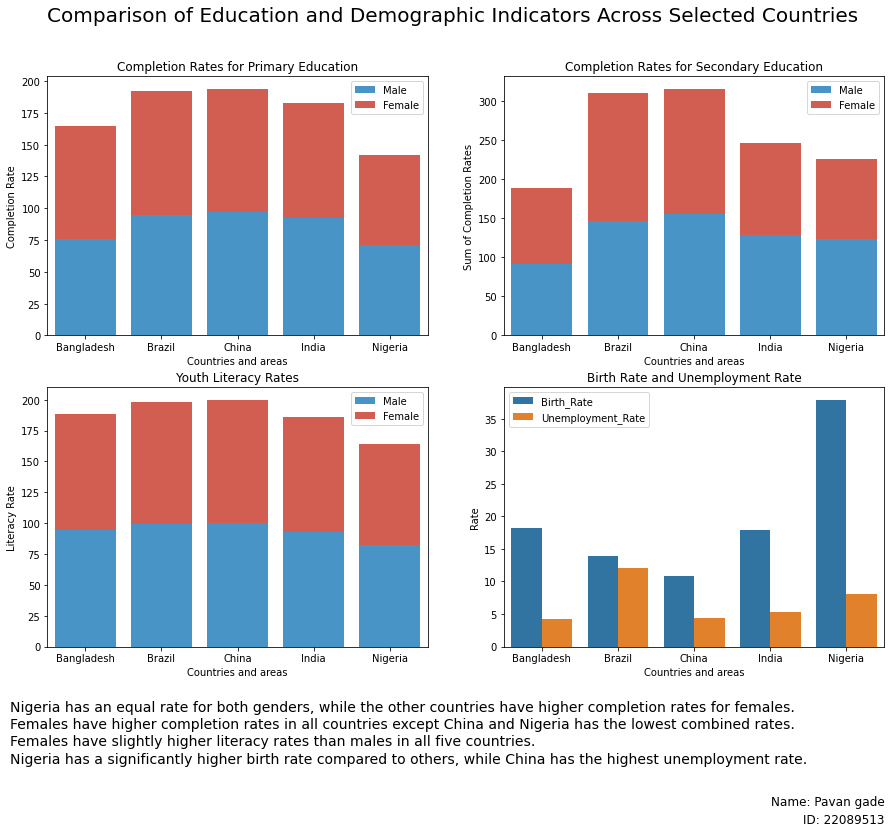

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# dataset
df = pd.read_csv("global_education_data.csv", encoding='latin1')

# Selecting relevant columns for the plots
selected_columns = [
    'Countries and areas',
    'Completion_Rate_Primary_Male',
    'Completion_Rate_Primary_Female',
    'Completion_Rate_Lower_Secondary_Male',
    'Completion_Rate_Upper_Secondary_Male',
    'Completion_Rate_Lower_Secondary_Female',
    'Completion_Rate_Upper_Secondary_Female',
    'Youth_15_24_Literacy_Rate_Male',
    'Youth_15_24_Literacy_Rate_Female',
    'Birth_Rate',
    'Unemployment_Rate',
]

# Selecting multiple countries
selected_countries = ['Bangladesh', 'Brazil', 'China', 'India', 'Nigeria']

# Filtering data for selected countries
countries_data = df.loc[df['Countries and areas'].isin(selected_countries)].copy()

# Creating a figure with 2x2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

fig.subplots_adjust(bottom=0.22)

# Plot 1: Stacked Bar Plot (Completion Rates for Primary Education - Male and Female)
sns.barplot(x='Countries and areas', y='Completion_Rate_Primary_Male', data=countries_data, ax=axes[0, 0], color='#3498db', label='Male')
sns.barplot(x='Countries and areas', y='Completion_Rate_Primary_Female', data=countries_data, ax=axes[0, 0], color='#e74c3c', label='Female', bottom=countries_data['Completion_Rate_Primary_Male'])
axes[0, 0].set_title('Completion Rates for Primary Education')
axes[0, 0].set_ylabel('Completion Rate')
axes[0, 0].legend()

# Plot 2: Stacked Bar Plot (Sum of Completion Rates for Secondary Education - Male and Female)
countries_data['Completion_Rate_Secondary_Male'] = (
    countries_data['Completion_Rate_Lower_Secondary_Male'] +
    countries_data['Completion_Rate_Upper_Secondary_Male']
)
countries_data['Completion_Rate_Secondary_Female'] = (
    countries_data['Completion_Rate_Lower_Secondary_Female'] +
    countries_data['Completion_Rate_Upper_Secondary_Female']
)

# Stacked bar plot for males
sns.barplot(x='Countries and areas', y='Completion_Rate_Secondary_Male', data=countries_data, ax=axes[0, 1], color='#3498db', label='Male')
# Stacked bar plot for females
sns.barplot(x='Countries and areas', y='Completion_Rate_Secondary_Female', data=countries_data, ax=axes[0, 1], color='#e74c3c', label='Female', bottom=countries_data['Completion_Rate_Secondary_Male'])
axes[0, 1].set_title('Completion Rates for Secondary Education')
axes[0, 1].set_ylabel('Sum of Completion Rates')
axes[0, 1].legend()

# Plot 3: Stacked Bar Plot (Youth Literacy Rates - Male and Female)
sns.barplot(x='Countries and areas', y='Youth_15_24_Literacy_Rate_Male', data=countries_data, ax=axes[1, 0], color='#3498db', label='Male')
sns.barplot(x='Countries and areas', y='Youth_15_24_Literacy_Rate_Male', data=countries_data, ax=axes[1, 0], color='#e74c3c', label='Female', bottom=countries_data['Youth_15_24_Literacy_Rate_Male'])
axes[1, 0].set_title('Youth Literacy Rates')
axes[1, 0].set_ylabel('Literacy Rate')
axes[1, 0].legend()

# Reshaping the DataFrame for grouped bar plot
melted_data = pd.melt(countries_data, id_vars=['Countries and areas'], value_vars=['Birth_Rate', 'Unemployment_Rate'], var_name='Category', value_name='Rate')

# Plot 4: Grouped Bar Plot (Separate bars for Birth Rate and Unemployment Rate for each country)
sns.barplot(x='Countries and areas', y='Rate', hue='Category', data=melted_data, ax=axes[1, 1])

axes[1, 1].set_title('Birth Rate and Unemployment Rate')
axes[1, 1].set_ylabel('Rate')
axes[1, 1].legend()

# Text Explanation
fig.text(0.5, 0.95, 'Comparison of Education and Demographic Indicators Across Selected Countries', ha='center', va='center', fontsize=20)

# Explanations for individual plots
fig.text(0.09, 0.15, 'Nigeria has an equal rate for both genders, while the other countries have higher completion rates for females.', ha='left', va='center', fontsize=14)
fig.text(0.09, 0.13, 'Females have higher completion rates in all countries except China and Nigeria has the lowest combined rates.', ha='left', va='center', fontsize=14)
fig.text(0.09, 0.11, 'Females have slightly higher literacy rates than males in all five countries.', ha='left', va='center', fontsize=14)
fig.text(0.09, 0.09, 'Nigeria has a significantly higher birth rate compared to others, while China has the highest unemployment rate.', ha='left', va='center', fontsize=14)


fig.text(0.9, 0.04, 'Name: Pavan gade', ha='right', va='center', fontsize=12)
fig.text(0.9, 0.02, 'ID: 22089513', ha='right', va='center', fontsize=12)

# Show the plot
plt.show()
